---
# 젤다의 전설 왕국의 눈물 '왕눈 공략' 토픽 분석
---

## 작업 내용
- 토큰화 및 용어 분류 추출
- 토큰 BOW 생성
- 다회 언급 키워드 추출 및 유형 분류
- wordcloud 이미지 + 다이어그램 시각화

# BOW

In [3]:
import pandas as pd
from konlpy.tag import Okt
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

/var/folders/y6/tjfrq8vj411cyf6zll2ppq_w0000gn/T/ipykernel_1242/928192703.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
def tokenize(dataFrame):
    okt = Okt()   
    dataFrame['morphs'] = [okt.morphs(content) for content in dataFrame['answers'] if content != "\n"]
    return dataFrame

def noun_tokenize(dataFrame):
    okt = Okt()   
    dataFrame['nouns'] = [okt.nouns(content) for content in dataFrame['answers'] if content != "\n"]
    return dataFrame

def data_preprocessing(dataFrame):
    dataframe = tokenize(dataFrame)
    dataframe = noun_tokenize(dataFrame)
    return dataFrame

In [5]:
df = pd.read_csv('./data/zelda_qna_all.csv')
df

,question,answers
0,... 젤다 왕눈의 공략법에 대해 물어보셨네요. 프루아 일지를 찾아 볼 때 추낙 고...,게임에 빠져 사는 ᵔᴥᵔ게임광ᵔᴥᵔ‍ 인사드립니다 ꒰⸝⸝•ᴗ•⸝⸝꒱੭⁾⁾\n ...
1,이거 어떻게 깨나요? 밖에 있는 마개를 울트라 핸드로 빼면 됩니다. 잘 안빠지는데요...,울트라핸드로 저 꽂혀 있는 마개 뽑으면 됩니다.
2,이거 어떻게 깨나요? 밖에 있는 마개를 울트라 핸드로 빼면 됩니다. 잘 안빠지는데요...,울트라핸드로 붙이시면 됩니다
3,이거 어떻게 깨나요? 밖에 있는 마개를 울트라 핸드로 빼면 됩니다. 잘 안빠지는데요...,"밖에 있는 마개를 울트라 핸드로 빼면 됩니다.\n잘 안빠지는데요,로켓같은 조나우 기..."
4,"... ### 왕눈 보스 공략 우선, 왕눈 보스는 상당히 강력한 적입니다. 하지만 ...",1. 그리오크 잡는 방법\n화살에 키이스 또는 카쿠다의 눈알을 스크래빌드하면 유도 ...
...,...,...
119,젤다 왕눈 지상 120개 하늘 32개 현재 151개인데 하늘섬엔 32개 보이는데 지...,즐겜되세요^^
120,... 공략 영상 유튜브를 찾아도 없어요 아니 진짜 뭐져 아무리 찾아도 없어요 2뢰...,"다크 헤드에 어둠의 옷, 하일리아 병사의 경갑으로 보입니다! 위치가 궁금하시다면 댓..."
121,... 공략 영상 유튜브를 찾아도 없어요 아니 진짜 뭐져 아무리 찾아도 없어요 2뢰...,젤다왕눈방어구세트는 눈방어 여왕을 물리치면 얻을 수 있습니다. 이 세트에는 눈방어 ...
122,이거 어떻게 깨나요? 밖에 있는 마개를 울트라 핸드로 빼면 됩니다. 잘 안빠지는데요...,시간의 오카리나가 옛날 게임이라 언급하신 야숨/왕눈/스소에 비하면 상당히 불친절하...


In [6]:
dataframe = data_preprocessing(df)
dataframe

,question,answers,morphs,nouns
0,... 젤다 왕눈의 공략법에 대해 물어보셨네요. 프루아 일지를 찾아 볼 때 추낙 고...,게임에 빠져 사는 ᵔᴥᵔ게임광ᵔᴥᵔ‍ 인사드립니다 ꒰⸝⸝•ᴗ•⸝⸝꒱੭⁾⁾\n ...,"[게임, 에, 빠져, 사는, ᵔᴥᵔ, 게임광, ᵔᴥᵔ‍, 인사, 드립니다, ꒰⸝⸝•...","[게임, 게임광, 인사, 최대한, 답변, 질문, 대한, 답변, 젤다, 왕눈, 공략,..."
1,이거 어떻게 깨나요? 밖에 있는 마개를 울트라 핸드로 빼면 됩니다. 잘 안빠지는데요...,울트라핸드로 저 꽂혀 있는 마개 뽑으면 됩니다.,"[울트라, 핸드, 로, 저, 꽂혀, 있는, 마개, 뽑으면, 됩니다, .]","[울트라, 핸드, 저, 마개]"
2,이거 어떻게 깨나요? 밖에 있는 마개를 울트라 핸드로 빼면 됩니다. 잘 안빠지는데요...,울트라핸드로 붙이시면 됩니다,"[울트라, 핸드, 로, 붙이시면, 됩니다]","[울트라, 핸드]"
3,이거 어떻게 깨나요? 밖에 있는 마개를 울트라 핸드로 빼면 됩니다. 잘 안빠지는데요...,"밖에 있는 마개를 울트라 핸드로 빼면 됩니다.\n잘 안빠지는데요,로켓같은 조나우 기...","[밖에, 있는, 마개, 를, 울트라, 핸드, 로, 빼면, 됩니다, ., \n, 잘,...","[마개, 울트라, 핸드, 로켓, 나우, 기어, 달, 앗, 채택]"
4,"... ### 왕눈 보스 공략 우선, 왕눈 보스는 상당히 강력한 적입니다. 하지만 ...",1. 그리오크 잡는 방법\n화살에 키이스 또는 카쿠다의 눈알을 스크래빌드하면 유도 ...,"[1, ., 그리, 오크, 잡는, 방법, \n, 화살, 에, 키, 이스, 또는, 카...","[오크, 방법, 화살, 키, 이스, 카, 쿠다, 눈알, 스, 드하, 유도, 화살, ..."
...,...,...,...,...
119,젤다 왕눈 지상 120개 하늘 32개 현재 151개인데 하늘섬엔 32개 보이는데 지...,즐겜되세요^^,"[즐겜, 되세요, ^^]",[즐겜]
120,... 공략 영상 유튜브를 찾아도 없어요 아니 진짜 뭐져 아무리 찾아도 없어요 2뢰...,"다크 헤드에 어둠의 옷, 하일리아 병사의 경갑으로 보입니다! 위치가 궁금하시다면 댓...","[다크, 헤드, 에, 어둠, 의, 옷, ,, 하일, 리아, 병사, 의, 경, 갑, ...","[다크, 헤드, 어둠, 옷, 하일, 리아, 병사, 갑, 위치, 댓글, 추가, 질문,..."
121,... 공략 영상 유튜브를 찾아도 없어요 아니 진짜 뭐져 아무리 찾아도 없어요 2뢰...,젤다왕눈방어구세트는 눈방어 여왕을 물리치면 얻을 수 있습니다. 이 세트에는 눈방어 ...,"[젤다, 왕, 눈, 방어, 구, 세트, 는, 눈, 방어, 여왕, 을, 물리, 치면,...","[젤다, 눈, 방어, 세트, 눈, 방어, 여왕, 물리, 치면, 수, 이, 세트, 눈..."
122,이거 어떻게 깨나요? 밖에 있는 마개를 울트라 핸드로 빼면 됩니다. 잘 안빠지는데요...,시간의 오카리나가 옛날 게임이라 언급하신 야숨/왕눈/스소에 비하면 상당히 불친절하...,"[시간, 의, 오카리나, 가, 옛날, 게임, 이라, 언급, 하신, 야, 숨, /, ...","[시간, 오카리나, 옛날, 게임, 언급, 숨, 왕눈, 스소, 비, 퍼즐, 풀이, 구..."


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  124 non-null    object
 1   answers   124 non-null    object
 2   morphs    124 non-null    object
 3   nouns     124 non-null    object
dtypes: object(4)
memory usage: 4.0+ KB


In [10]:
def col_to_doc(col):
    combined_list = col.tolist()
    combined_string = sum(combined_list,[])

    return combined_string

In [11]:
doc_noun = col_to_doc(dataframe['nouns'])
doc_noun

['게임',
 '게임광',
 '인사',
 '최대한',
 '답변',
 '질문',
 '대한',
 '답변',
 '젤다',
 '왕눈',
 '공략',
 '법',
 '대해',
 '프루',
 '일지',
 '볼',
 '때',
 '추낙',
 '고대',
 '연구소',
 '수',
 '이',
 '위치',
 '젤다',
 '게임',
 '마을',
 '서쪽',
 '이동',
 '사막',
 '지역',
 '안',
 '수',
 '연구소',
 '내부',
 '여러',
 '가지',
 '퍼즐',
 '풀',
 '보물',
 '행운',
 '빌어',
 '답변',
 '채택',
 '점',
 '또',
 '추가',
 '질문',
 '울트라',
 '핸드',
 '저',
 '마개',
 '울트라',
 '핸드',
 '마개',
 '울트라',
 '핸드',
 '로켓',
 '나우',
 '기어',
 '달',
 '앗',
 '채택',
 '오크',
 '방법',
 '화살',
 '키',
 '이스',
 '카',
 '쿠다',
 '눈알',
 '스',
 '드하',
 '유도',
 '화살',
 '머리',
 '유도',
 '그냥',
 '임',
 '바닥',
 '아무',
 '머리',
 '손검',
 '훨',
 '윈드',
 '창',
 '공격',
 '가장',
 '걸',
 '반복',
 '데',
 '가마',
 '방법',
 '입',
 '때',
 '조명',
 '꽃',
 '소재',
 '꼭꼭',
 '행동',
 '취합니',
 '이',
 '때',
 '화살',
 '눈',
 '일정',
 '시간',
 '동안',
 '양쪽',
 '앞발',
 '타고',
 '등',
 '나니',
 '움',
 '광',
 '손',
 '검',
 '훨',
 '윈드',
 '공격',
 '전부',
 '파괴',
 '입',
 '때',
 '폭탄',
 '꽃',
 '꼭꼭',
 '행동',
 '눈',
 '내부',
 '폭발',
 '일정',
 '시간',
 '동안',
 '폭탄',
 '꽃',
 '여유',
 '추천',
 '안녕하십니까',
 '답변',
 '왕눈',
 '보스',
 '공략',
 '우선',
 '왕눈',
 '보스',
 '적',
 '데',

In [12]:
doc_morphs = col_to_doc(dataframe['morphs'])
doc_morphs

['게임',
 '에',
 '빠져',
 '사는',
 'ᵔᴥᵔ',
 '게임광',
 'ᵔᴥᵔ\u200d',
 '인사',
 '드립니다',
 '꒰⸝⸝•ᴗ•⸝⸝꒱੭⁾⁾',
 '\n       ',
 '최대한',
 '간결하고',
 '정확한',
 '답변',
 '드려',
 '볼게요',
 '!',
 '\n  ',
 '질문',
 '에',
 '대한',
 '답변',
 ':',
 '안녕하세요',
 '!',
 '젤다',
 '왕눈',
 '의',
 '공략',
 '법',
 '에',
 '대해',
 '물어보셨네요',
 '.',
 '프루',
 '아',
 '일지',
 '를',
 '찾아',
 '볼',
 '때',
 '추낙',
 '고대',
 '연구소',
 '에서',
 '찾을',
 '있다고',
 '하네요',
 '.',
 '위치',
 '는',
 '젤다',
 '게임',
 '마을',
 '에서',
 '서쪽',
 '으로',
 '이동',
 '하여',
 ',',
 '사막',
 '지역',
 '안',
 '으로',
 '들어가면',
 '찾을',
 '있습니다',
 '.',
 '연구소',
 '내부',
 '에서는',
 '여러',
 '가지',
 '퍼즐',
 '을',
 '풀',
 '고',
 '보물',
 '을',
 '찾으면',
 '됩니다',
 '.',
 '행운',
 '을',
 '빌어',
 '요',
 '!',
 '\n   ',
 'ᵔᴥᵔ',
 '답변',
 '에',
 '만족하셨다면',
 '채택',
 '부탁드려요',
 'ᵔᴥᵔ',
 '\n         ',
 'ᵔᴥᵔ',
 '궁금하신',
 '점',
 '또',
 '있으시다면',
 '추가',
 '질문',
 '을',
 '부탁드리겠습니다',
 'ᵔᴥᵔ',
 '\n  ',
 '울트라',
 '핸드',
 '로',
 '저',
 '꽂혀',
 '있는',
 '마개',
 '뽑으면',
 '됩니다',
 '.',
 '울트라',
 '핸드',
 '로',
 '붙이시면',
 '됩니다',
 '밖에',
 '있는',
 '마개',
 '를',
 '울트라',
 '핸드',
 '로',
 '빼면',
 '됩니다',
 '.',
 '\n',
 

In [19]:
def build_wto_bow_cws(tokenized_document):
    # BoW와 단어집합 만들기 - 객체 선언
    bow = []                                          
    word_to_index = {}                                  
    word_counts = {}
    # Bow와 단어집합 만들기
    for word in tokenized_document:
        if word not in ['!', '.', '', ','] and '\\' not in word:
            if word not in word_to_index.keys():
                word_to_index[word] = len(word_to_index)
                bow.insert(len(word_to_index) - 1, 1)
            else:                                           
                index = word_to_index.get(word)
                bow[index] += 1
    word_counts = {key:bow[idx] for idx,key in enumerate(word_to_index)}
    
    return word_to_index, bow, word_counts

def remove_stop_words(word_counts):
    keys_to_remove = ['이', '것', '수', '게임', '왕눈', '공격', '답변', '젤다', '공략', '방법', '질문', '도움']
    for key in keys_to_remove:
        word_counts.pop(key, None)
    return word_counts

In [20]:
wti_nouns, bow_nouns, word_counts_nouns = build_wto_bow_cws(doc_noun)
word_counts_nouns


{'게임': 92,
 '게임광': 9,
 '인사': 9,
 '최대한': 9,
 '답변': 56,
 '질문': 31,
 '대한': 11,
 '젤다': 44,
 '왕눈': 56,
 '공략': 36,
 '법': 3,
 '대해': 8,
 '프루': 1,
 '일지': 1,
 '볼': 6,
 '때': 24,
 '추낙': 1,
 '고대': 1,
 '연구소': 2,
 '수': 95,
 '이': 57,
 '위치': 20,
 '마을': 7,
 '서쪽': 1,
 '이동': 11,
 '사막': 1,
 '지역': 9,
 '안': 16,
 '내부': 3,
 '여러': 12,
 '가지': 17,
 '퍼즐': 5,
 '풀': 5,
 '보물': 1,
 '행운': 4,
 '빌어': 1,
 '채택': 20,
 '점': 22,
 '또': 11,
 '추가': 19,
 '울트라': 7,
 '핸드': 7,
 '저': 24,
 '마개': 2,
 '로켓': 7,
 '나우': 12,
 '기어': 7,
 '달': 4,
 '앗': 2,
 '오크': 3,
 '방법': 41,
 '화살': 26,
 '키': 5,
 '이스': 4,
 '카': 1,
 '쿠다': 1,
 '눈알': 2,
 '스': 8,
 '드하': 2,
 '유도': 3,
 '머리': 12,
 '그냥': 11,
 '임': 2,
 '바닥': 4,
 '아무': 1,
 '손검': 3,
 '훨': 3,
 '윈드': 3,
 '창': 3,
 '공격': 57,
 '가장': 6,
 '걸': 8,
 '반복': 6,
 '데': 12,
 '가마': 6,
 '입': 2,
 '조명': 1,
 '꽃': 10,
 '소재': 1,
 '꼭꼭': 2,
 '행동': 4,
 '취합니': 1,
 '눈': 15,
 '일정': 2,
 '시간': 14,
 '동안': 7,
 '양쪽': 1,
 '앞발': 1,
 '타고': 3,
 '등': 13,
 '나니': 7,
 '움': 7,
 '광': 5,
 '손': 2,
 '검': 5,
 '전부': 5,
 '파괴': 1,
 '폭탄': 16,
 '폭발': 2,
 

In [21]:
wti_morphs, bow_morphs, word_counts_morphs = build_wto_bow_cws(doc_morphs)
word_counts_morphs


{'게임': 92,
 '에': 179,
 '빠져': 9,
 '사는': 10,
 'ᵔᴥᵔ': 45,
 '게임광': 9,
 'ᵔᴥᵔ\u200d': 9,
 '인사': 9,
 '드립니다': 20,
 '꒰⸝⸝•ᴗ•⸝⸝꒱੭⁾⁾': 9,
 '\n       ': 4,
 '최대한': 9,
 '간결하고': 9,
 '정확한': 11,
 '답변': 56,
 '드려': 9,
 '볼게요': 9,
 '\n  ': 21,
 '질문': 31,
 '대한': 11,
 ':': 39,
 '안녕하세요': 12,
 '젤다': 44,
 '왕눈': 56,
 '의': 162,
 '공략': 36,
 '법': 3,
 '대해': 8,
 '물어보셨네요': 1,
 '프루': 1,
 '아': 7,
 '일지': 1,
 '를': 158,
 '찾아': 4,
 '볼': 6,
 '때': 24,
 '추낙': 1,
 '고대': 1,
 '연구소': 2,
 '에서': 99,
 '찾을': 8,
 '있다고': 2,
 '하네요': 3,
 '위치': 20,
 '는': 72,
 '마을': 7,
 '서쪽': 1,
 '으로': 74,
 '이동': 11,
 '하여': 31,
 '사막': 1,
 '지역': 9,
 '안': 21,
 '들어가면': 3,
 '있습니다': 74,
 '내부': 3,
 '에서는': 15,
 '여러': 13,
 '가지': 17,
 '퍼즐': 5,
 '을': 311,
 '풀': 5,
 '고': 25,
 '보물': 1,
 '찾으면': 1,
 '됩니다': 44,
 '행운': 4,
 '빌어': 1,
 '요': 9,
 '\n   ': 24,
 '만족하셨다면': 12,
 '채택': 20,
 '부탁드려요': 9,
 '\n         ': 5,
 '궁금하신': 13,
 '점': 22,
 '또': 11,
 '있으시다면': 13,
 '추가': 19,
 '부탁드리겠습니다': 12,
 '울트라': 7,
 '핸드': 7,
 '로': 65,
 '저': 27,
 '꽂혀': 1,
 '있는': 40,
 '마개': 2,
 '뽑으면': 3,
 '붙이시면

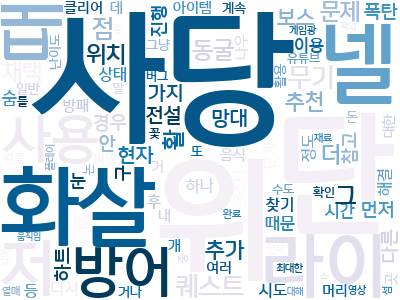

In [22]:
from wordcloud import WordCloud

wc = WordCloud(font_path='/Library/Fonts/paybooc Bold.ttf',background_color='white', max_words=100, width=400, height=300,colormap='PuBu')
word_counts_nouns = remove_stop_words(word_counts_nouns)
cloud_nouns = wc.fit_words(word_counts_nouns)
cloud_nouns.to_image()

In [26]:
word_counts_morphs = remove_stop_words(word_counts_morphs)
word_counts_morphs

{'에': 179,
 '빠져': 9,
 '사는': 10,
 'ᵔᴥᵔ': 45,
 '게임광': 9,
 'ᵔᴥᵔ\u200d': 9,
 '인사': 9,
 '드립니다': 20,
 '꒰⸝⸝•ᴗ•⸝⸝꒱੭⁾⁾': 9,
 '\n       ': 4,
 '최대한': 9,
 '간결하고': 9,
 '정확한': 11,
 '드려': 9,
 '볼게요': 9,
 '\n  ': 21,
 '대한': 11,
 ':': 39,
 '안녕하세요': 12,
 '의': 162,
 '법': 3,
 '대해': 8,
 '물어보셨네요': 1,
 '프루': 1,
 '아': 7,
 '일지': 1,
 '를': 158,
 '찾아': 4,
 '볼': 6,
 '때': 24,
 '추낙': 1,
 '고대': 1,
 '연구소': 2,
 '에서': 99,
 '찾을': 8,
 '있다고': 2,
 '하네요': 3,
 '위치': 20,
 '는': 72,
 '마을': 7,
 '서쪽': 1,
 '으로': 74,
 '이동': 11,
 '하여': 31,
 '사막': 1,
 '지역': 9,
 '안': 21,
 '들어가면': 3,
 '있습니다': 74,
 '내부': 3,
 '에서는': 15,
 '여러': 13,
 '가지': 17,
 '퍼즐': 5,
 '을': 311,
 '풀': 5,
 '고': 25,
 '보물': 1,
 '찾으면': 1,
 '됩니다': 44,
 '행운': 4,
 '빌어': 1,
 '요': 9,
 '\n   ': 24,
 '만족하셨다면': 12,
 '채택': 20,
 '부탁드려요': 9,
 '\n         ': 5,
 '궁금하신': 13,
 '점': 22,
 '또': 11,
 '있으시다면': 13,
 '추가': 19,
 '부탁드리겠습니다': 12,
 '울트라': 7,
 '핸드': 7,
 '로': 65,
 '저': 27,
 '꽂혀': 1,
 '있는': 40,
 '마개': 2,
 '뽑으면': 3,
 '붙이시면': 1,
 '밖에': 2,
 '빼면': 1,
 '\n': 333,
 '잘': 14,
 '빠지는데요': 1,
 '로켓'

In [37]:
# 이모지 제거
def is_korean_or_allowed_punctuation(char):
    return '\uac00' <= char <= '\ud7a3' or char in ['.', ',', ':', '!', '?']

# Remove newline characters, trim spaces, and keep Korean text and some punctuation
cleaned_morphs = {k.strip(): v for k, v in word_counts_morphs.items() if k.strip()}
cleaned_morphs = {k: v for k, v in cleaned_morphs.items() if all(is_korean_or_allowed_punctuation(c) or c.isdigit() for c in k)}


In [38]:
cleaned_morphs

{'에': 179,
 '빠져': 9,
 '사는': 10,
 '게임광': 9,
 '인사': 9,
 '드립니다': 20,
 '최대한': 9,
 '간결하고': 9,
 '정확한': 11,
 '드려': 9,
 '볼게요': 9,
 '대한': 11,
 ':': 39,
 '안녕하세요': 12,
 '의': 162,
 '법': 3,
 '대해': 8,
 '물어보셨네요': 1,
 '프루': 1,
 '아': 7,
 '일지': 1,
 '를': 158,
 '찾아': 4,
 '볼': 6,
 '때': 24,
 '추낙': 1,
 '고대': 1,
 '연구소': 2,
 '에서': 99,
 '찾을': 8,
 '있다고': 2,
 '하네요': 3,
 '위치': 20,
 '는': 72,
 '마을': 7,
 '서쪽': 1,
 '으로': 74,
 '이동': 11,
 '하여': 31,
 '사막': 1,
 '지역': 9,
 '안': 21,
 '들어가면': 3,
 '있습니다': 74,
 '내부': 3,
 '에서는': 15,
 '여러': 13,
 '가지': 17,
 '퍼즐': 5,
 '을': 311,
 '풀': 5,
 '고': 25,
 '보물': 1,
 '찾으면': 1,
 '됩니다': 44,
 '행운': 4,
 '빌어': 1,
 '요': 9,
 '만족하셨다면': 12,
 '채택': 20,
 '부탁드려요': 9,
 '궁금하신': 13,
 '점': 22,
 '또': 11,
 '있으시다면': 13,
 '추가': 19,
 '부탁드리겠습니다': 12,
 '울트라': 7,
 '핸드': 7,
 '로': 65,
 '저': 27,
 '꽂혀': 1,
 '있는': 40,
 '마개': 2,
 '뽑으면': 3,
 '붙이시면': 1,
 '밖에': 2,
 '빼면': 1,
 '잘': 14,
 '빠지는데요': 1,
 '로켓': 7,
 '같은': 10,
 '조': 37,
 '나우': 12,
 '기어': 7,
 '달': 4,
 '면': 24,
 '빠집니다': 1,
 '???:': 1,
 '앗': 2,
 '걸렸다': 1,
 '해주시면': 2,
 '

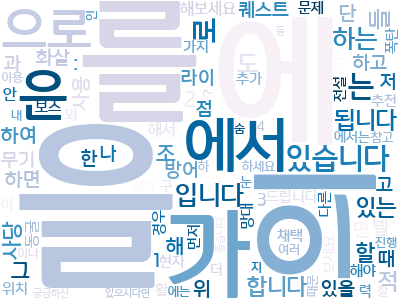

In [39]:
wc = WordCloud(font_path='/Library/Fonts/paybooc Bold.ttf',background_color='white', max_words=100, width=400, height=300,colormap='PuBu')
cleand_morphs = remove_stop_words(cleaned_morphs)
cloud_morphs = wc.fit_words(cleaned_morphs)
cloud_morphs.to_image()

In [41]:
def word_counts_to_df(word_counts):
    df = pd.DataFrame.from_dict(word_counts, orient='index')
    df = df.rename(columns={0:'counts'})
    df = df.reset_index()
    df.sort_values('counts',ascending=False).head(20)
    return df

In [42]:
df_nouns = word_counts_to_df(word_counts_nouns)
df_nouns

,index,counts
0,게임광,9
1,인사,9
2,최대한,9
3,대한,11
4,법,3
...,...,...
1147,카토,1
1148,트와일라잇,1
1149,프린세스,1
1150,절대,1


In [43]:
df_morphs = word_counts_to_df(cleaned_morphs)
df_morphs

,index,counts
0,에,179
1,빠져,9
2,사는,10
3,게임광,9
4,인사,9
...,...,...
2199,트와일라잇,1
2200,프린세스,1
2201,이는,1
2202,절대,1


In [ ]:
# !pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


In [ ]:
df_morphs.to_excel('./data/zelda_qna_shrine_topic_morphs.xlsx',index=False)
df_nouns.to_excel('./data/zelda_qna_shrine_topic_nouns.xlsx',index=False)

# Kiwi

In [44]:
# doc_answers = col_to_doc(dataframe['answers'])
doc_answers = dataframe['answers'].tolist()
doc_answers = " ".join(doc_answers)
doc_answers

'   게임에 빠져 사는 ᵔᴥᵔ게임광ᵔᴥᵔ\u200d 인사드립니다 ꒰⸝⸝•ᴗ•⸝⸝꒱੭⁾⁾\n       최대한 간결하고 정확한 답변 드려볼게요!\n  질문에 대한 답변: \n안녕하세요! 젤다 왕눈의 공략법에 대해 물어보셨네요. 프루아 일지를 찾아 볼 때 추낙 고대 연구소에서 찾을 수 있다고 하네요. \n  이 위치는 젤다 게임 마을에서 서쪽으로 이동하여, 사막 지역 안으로 들어가면 찾을 수 있습니다. 연구소 내부에서는 여러 가지 퍼즐을 풀고 보물을 찾으면 됩니다. \n  행운을 빌어요!\n   ᵔᴥᵔ답변에 만족하셨다면 채택 부탁드려요ᵔᴥᵔ\n         ᵔᴥᵔ궁금하신점이 또 있으시다면 추가질문을 부탁드리겠습니다ᵔᴥᵔ\n   울트라핸드로 저 꽂혀 있는 마개 뽑으면 됩니다. 울트라핸드로 붙이시면 됩니다 밖에 있는 마개를 울트라 핸드로 빼면 됩니다.\n잘 안빠지는데요,로켓같은 조나우 기어를 달면\n잘 빠집니다.\n???:아앗 걸렸다!\n채택해주시면 감사하겠습니다. 1. 그리오크 잡는 방법\n화살에 키이스 또는 카쿠다의 눈알을 스크래빌드하면 유도 화살이 됩니다.\n머리를 유도하므로 그냥 에임 맞춰서 쏘면 됩니다.\n바닥에 쓰러지면 아무 머리로 가서 양손검 훨 윈드를 쓰거나 창 공격이 가장 좋습니다.\n이걸 반복하면 됩니다.\n2. 데그가마 잡는 방법\n입 벌려서 빨아들이려 할 때 조명꽃같은 소재 던지면 꼭꼭 씹어먹는 행동을 취합니다.\n이 때 화살로 눈을 맞추면 일정 시간동안 쓰러집니다.\n양쪽 앞발을 타고 등에 있는 조나니움 광상을 양손 검 훨 윈드로 공격해서 전부 파괴하면 됩니다.\n입 벌려서 빨아들일 때 폭탄꽃을 던지면 꼭꼭 씹어먹는 행동이 끝나고 눈을 맞추지 않더라도 내부 폭발로 인해 일정 시간동안 쓰러지므로 폭탄꽃 여유가 있다면 추천합니다. 안녕하십니까? 답변드려요.\n### 왕눈 보스 공략\n우선, 왕눈 보스는 상당히 강력한 적입니다. 하지만 어떻게 하면 데그가마를 잡을 수 있을까요? 아래의 단계를 따라서 해보세요.\n1. **적의 공격을 방어하세요.*

In [ ]:
# !pip install kiwipiepy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 13.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 4.6 MB/s eta 0:00:0000:0100:01m
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813255 sha256=d2303ce51d687e9e8073936504977613711a0eba3de77f7ed4febfc825545e1e
  Stored in directory: /Users/brielle/Library/Caches/pip/wheels/0e/b1/2e/7b2722738bacae13370d8c757f01c3cdf07e9f05350c646f52
Successfully built kiwipiepy-model


In [45]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

result = kiwi.analyze(doc_answers)
result

a = 0

try:
    for idx, x in enumerate(result):
        print(x)
        a = idx
    print(a)
except:
    pass

    

([Token(form='게임', tag='NNG', start=3, len=2), Token(form='에', tag='JKB', start=5, len=1), Token(form='빠지', tag='VV', start=7, len=2), Token(form='어', tag='EC', start=8, len=1), Token(form='살', tag='VV', start=10, len=1), Token(form='는', tag='ETM', start=11, len=1), Token(form='ᵔᴥᵔ', tag='SW', start=13, len=3), Token(form='게임', tag='NNG', start=16, len=2), Token(form='광', tag='XSN', start=18, len=1), Token(form='ᵔᴥᵔ', tag='SW', start=19, len=3), Token(form='인사', tag='NNG', start=24, len=2), Token(form='드리', tag='VV', start=26, len=2), Token(form='ᆸ니다', tag='EF', start=27, len=3), Token(form='꒰⸝⸝•ᴗ•⸝⸝꒱੭⁾⁾', tag='SW', start=31, len=12), Token(form='최대한', tag='MAG', start=51, len=3), Token(form='간결', tag='XR', start=55, len=2), Token(form='하', tag='XSA', start=57, len=1), Token(form='고', tag='EC', start=58, len=1), Token(form='정확', tag='NNG', start=60, len=2), Token(form='하', tag='XSA', start=62, len=1), Token(form='ᆫ', tag='ETM', start=62, len=1), Token(form='답변', tag='NNG', start=64, le

In [46]:
result[0][0]

[Token(form='게임', tag='NNG', start=3, len=2),
 Token(form='에', tag='JKB', start=5, len=1),
 Token(form='빠지', tag='VV', start=7, len=2),
 Token(form='어', tag='EC', start=8, len=1),
 Token(form='살', tag='VV', start=10, len=1),
 Token(form='는', tag='ETM', start=11, len=1),
 Token(form='ᵔᴥᵔ', tag='SW', start=13, len=3),
 Token(form='게임', tag='NNG', start=16, len=2),
 Token(form='광', tag='XSN', start=18, len=1),
 Token(form='ᵔᴥᵔ', tag='SW', start=19, len=3),
 Token(form='인사', tag='NNG', start=24, len=2),
 Token(form='드리', tag='VV', start=26, len=2),
 Token(form='ᆸ니다', tag='EF', start=27, len=3),
 Token(form='꒰⸝⸝•ᴗ•⸝⸝꒱੭⁾⁾', tag='SW', start=31, len=12),
 Token(form='최대한', tag='MAG', start=51, len=3),
 Token(form='간결', tag='XR', start=55, len=2),
 Token(form='하', tag='XSA', start=57, len=1),
 Token(form='고', tag='EC', start=58, len=1),
 Token(form='정확', tag='NNG', start=60, len=2),
 Token(form='하', tag='XSA', start=62, len=1),
 Token(form='ᆫ', tag='ETM', start=62, len=1),
 Token(form='답변', tag

In [47]:
words_kiwi = []
for token, pos, start, end in result[0][0]:
    if pos[0] in 'NV':
        words_kiwi.append(f'{token}/{pos}')
words_kiwi

['게임/NNG',
 '빠지/VV',
 '살/VV',
 '게임/NNG',
 '인사/NNG',
 '드리/VV',
 '정확/NNG',
 '답변/NNG',
 '드리/VV',
 '보/VX',
 '질문/NNG',
 '대하/VV',
 '답변/NNG',
 '안녕/NNG',
 '젤다/NNP',
 '왕/NNG',
 '눈/NNG',
 '공략법/NNG',
 '대하/VV',
 '물어보/VV',
 '프루아/NNG',
 '일지/NNG',
 '찾/VV',
 '보/VX',
 '때/NNG',
 '추낙/NNP',
 '고대/NNG',
 '연구소/NNG',
 '찾/VV',
 '수/NNB',
 '있/VA',
 '하/VV',
 '위치/NNG',
 '젤다/NNP',
 '게임/NNG',
 '마을/NNG',
 '서쪽/NNG',
 '이동/NNG',
 '사막/NNG',
 '지역/NNG',
 '안/NNG',
 '들어가/VV',
 '찾/VV',
 '수/NNB',
 '있/VA',
 '연구소/NNG',
 '내부/NNG',
 '가지/NNB',
 '퍼즐/NNG',
 '풀/VV',
 '보물/NNG',
 '찾/VV',
 '되/VV',
 '행운/NNG',
 '빌/VV',
 '답변/NNG',
 '만족/NNG',
 '채택/NNG',
 '부탁드리/VV',
 '점/NNG',
 '있/VA',
 '추가/NNG',
 '질문/NNG',
 '부탁/NNG',
 '드리/VV',
 '울트라/NNG',
 '핸드/NNG',
 '꽂히/VV',
 '있/VX',
 '마개/NNG',
 '뽑/VV-R',
 '되/VV',
 '울트라/NNG',
 '핸드/NNG',
 '붙이/VV',
 '되/VV',
 '밖/NNG',
 '있/VV',
 '마개/NNG',
 '울트라/NNG',
 '핸드/NNG',
 '빼/VV',
 '되/VV',
 '빠지/VV',
 '로켓/NNG',
 '같/VA',
 '조/NNG',
 '우/NNG',
 '기어/NNG',
 '달/VV',
 '빠지/VV',
 '걸리/VV',
 '채택/NNG',
 '주/VX',
 '감사/NNG',
 '그리오크/NNG',
 

In [48]:
wti_kiwi, bow_kiwi, word_counts_kiwi = build_wto_bow_cws(words_kiwi)
word_counts_kiwi

{'게임/NNG': 102,
 '빠지/VV': 18,
 '살/VV': 9,
 '인사/NNG': 9,
 '드리/VV': 56,
 '정확/NNG': 11,
 '답변/NNG': 56,
 '보/VX': 96,
 '질문/NNG': 28,
 '대하/VV': 19,
 '안녕/NNG': 12,
 '젤다/NNP': 44,
 '왕/NNG': 59,
 '눈/NNG': 54,
 '공략법/NNG': 3,
 '물어보/VV': 2,
 '프루아/NNG': 2,
 '일지/NNG': 1,
 '찾/VV': 47,
 '때/NNG': 23,
 '추낙/NNP': 1,
 '고대/NNG': 1,
 '연구소/NNG': 2,
 '수/NNB': 118,
 '있/VA': 149,
 '하/VV': 79,
 '위치/NNG': 20,
 '마을/NNG': 7,
 '서쪽/NNG': 1,
 '이동/NNG': 12,
 '사막/NNG': 1,
 '지역/NNG': 9,
 '안/NNG': 6,
 '들어가/VV': 11,
 '내부/NNG': 3,
 '가지/NNB': 11,
 '퍼즐/NNG': 5,
 '풀/VV': 1,
 '보물/NNG': 4,
 '되/VV': 104,
 '행운/NNG': 4,
 '빌/VV': 4,
 '만족/NNG': 12,
 '채택/NNG': 20,
 '부탁드리/VV': 9,
 '점/NNG': 21,
 '추가/NNG': 19,
 '부탁/NNG': 18,
 '울트라/NNG': 7,
 '핸드/NNG': 7,
 '꽂히/VV': 1,
 '있/VX': 41,
 '마개/NNG': 2,
 '뽑/VV-R': 5,
 '붙이/VV': 4,
 '밖/NNG': 2,
 '있/VV': 52,
 '빼/VV': 1,
 '로켓/NNG': 7,
 '같/VA': 28,
 '조/NNG': 2,
 '우/NNG': 1,
 '기어/NNG': 4,
 '달/VV': 8,
 '걸리/VV': 1,
 '주/VX': 12,
 '감사/NNG': 3,
 '그리오크/NNG': 2,
 '잡/VV-R': 31,
 '방법/NNG': 41,
 '화살/NNG': 25,
 '키이

In [54]:
df_kiwi = word_counts_to_df(word_counts_kiwi)
df_kiwi.sort_values('counts',ascending=False)

,index,counts
126,이/VCP,156
24,있/VA,149
23,수/NNB,118
39,되/VV,104
0,게임/NNG,102
...,...,...
1345,몽환/NNG,1
1346,모래시계/NNP,1
1347,트라이포스/NNP,1
1348,시간/NNB,1


In [50]:
df_kiwi.to_excel('./data/zelda_qna_shrine_topic_kiwi.xlsx',index=False)

In [52]:
df_kiwi['index'] = df_kiwi['index'].apply(lambda x : x.split("/")[0])
cleaned_kiwi = {key:value for key,value in zip(df_kiwi['index'],df_kiwi['counts'])}
cleaned_kiwi

{'게임': 102,
 '빠지': 18,
 '살': 1,
 '인사': 9,
 '드리': 10,
 '정확': 11,
 '답변': 56,
 '보': 27,
 '질문': 28,
 '대하': 19,
 '안녕': 12,
 '젤다': 44,
 '왕': 3,
 '눈': 54,
 '공략법': 3,
 '물어보': 2,
 '프루아': 1,
 '일지': 1,
 '찾': 47,
 '때': 23,
 '추낙': 1,
 '고대': 1,
 '연구소': 2,
 '수': 118,
 '있': 52,
 '하': 2,
 '위치': 20,
 '마을': 7,
 '서쪽': 1,
 '이동': 12,
 '사막': 1,
 '지역': 9,
 '안': 6,
 '들어가': 11,
 '내부': 3,
 '가지': 1,
 '퍼즐': 5,
 '풀': 4,
 '보물': 4,
 '되': 104,
 '행운': 4,
 '빌': 4,
 '만족': 12,
 '채택': 20,
 '부탁드리': 9,
 '점': 21,
 '추가': 19,
 '부탁': 18,
 '울트라': 7,
 '핸드': 7,
 '꽂히': 1,
 '마개': 2,
 '뽑': 5,
 '붙이': 4,
 '밖': 2,
 '빼': 1,
 '로켓': 7,
 '같': 28,
 '조': 2,
 '우': 1,
 '기어': 2,
 '달': 1,
 '걸리': 1,
 '주': 7,
 '감사': 3,
 '그리오크': 1,
 '잡': 31,
 '방법': 41,
 '화살': 25,
 '키이스': 1,
 '카쿠다': 1,
 '눈알': 2,
 '스크래빌드': 1,
 '유도': 2,
 '머리': 12,
 '임': 3,
 '맞추': 6,
 '쏘': 14,
 '바닥': 4,
 '쓰러지': 4,
 '가': 2,
 '양손': 4,
 '검': 6,
 '윈드': 3,
 '쓰': 14,
 '창': 3,
 '공격': 45,
 '좋': 42,
 '이거': 4,
 '반복': 6,
 '데그가마': 1,
 '입': 1,
 '벌리': 2,
 '빨아들이': 2,
 '조명': 1,
 '꽃': 10,
 '소재': 1,
 '던지'

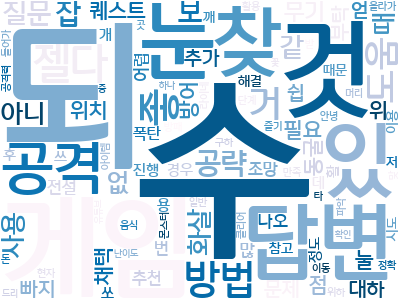

In [53]:
wc = WordCloud(font_path='/Library/Fonts/paybooc Bold.ttf',background_color='white', max_words=100, width=400, height=300,colormap='PuBu')
cloud_kiwi = wc.fit_words(cleaned_kiwi)
cloud_kiwi.to_image()